# Mengestimasi nilai a dan b value pada data katalog

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from custom_openquake import *

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 2. Baca data katalog

In [2]:
catalogue = catalogue_from_pkl('dict_catalogue_fault_Enggano.pkl')

## 3. Menghitung Mc

<Figure size 640x480 with 0 Axes>

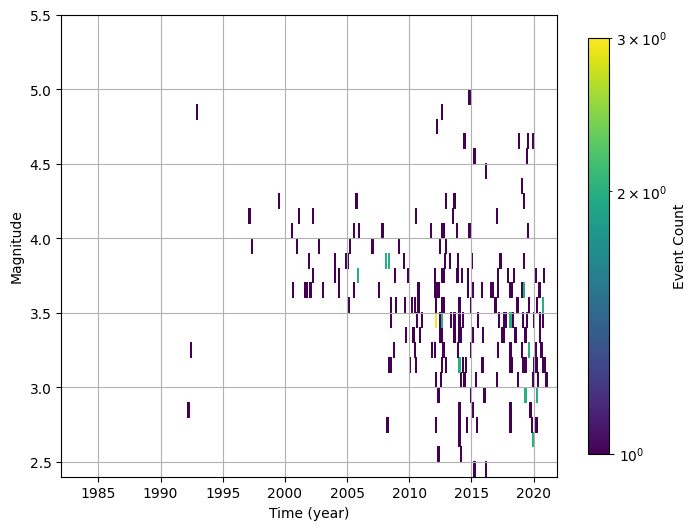

In [3]:
magnitude_bin_width = 0.1
time_bin_width = 0.1

plt.set_cmap('viridis')
plot_magnitude_time_density(catalogue, magnitude_bin_width, time_bin_width)
plt.savefig(os.path.join(dir_figs, 'plot_magnitude_time_density-catalogue_area_fault.png'), dpi=300)

In [5]:
comp_config = {'magnitude_bin': 0.1,
                'time_bin': 5. ,
                'increment_lock': True }

completeness_table, completeness_table_old = magnitude_of_completeness(catalogue, 
                                                                        comp_config, mag_range=[3., 4.])

print("== Keseluruhan Mc ==")
print(completeness_table_old)
print("\n== selected Mc ==")
print(completeness_table)

== Keseluruhan Mc ==
[[2010.     2.3]
 [2010.     2.4]
 [2010.     2.5]
 [2009.     2.6]
 [2009.     2.7]
 [2009.     2.8]
 [2009.     2.9]
 [2008.     3. ]
 [2008.     3.1]
 [2007.     3.2]
 [2007.     3.3]
 [2007.     3.4]
 [2007.     3.5]
 [2004.     3.6]
 [1997.     3.7]
 [1997.     3.8]
 [1991.     3.9]
 [1991.     4. ]
 [1991.     4.1]
 [1991.     4.2]
 [1991.     4.3]
 [1991.     4.4]
 [1991.     4.5]
 [1991.     4.6]
 [1991.     4.7]
 [1991.     4.8]
 [1991.     4.9]
 [1991.     5. ]
 [1991.     5.1]
 [1991.     5.2]
 [1991.     5.3]
 [1991.     5.4]]

== selected Mc ==
[[2008.     3. ]
 [2007.     3.2]
 [2004.     3.6]
 [1997.     3.7]
 [1991.     3.9]]


In [12]:
completeness_table = np.array(completeness_table.tolist() + [[2008, 3.5]])
completeness_table

array([[2008. ,    3. ],
       [2007. ,    3.2],
       [2004. ,    3.6],
       [1997. ,    3.7],
       [1991. ,    3.9],
       [2008. ,    3.5],
       [2008. ,    3.5]])

In [5]:
mle_config = {'magnitude_interval': 0.1 ,
              'Average Type': 'Weighted',
              'reference_magnitude': None }
b_val, sigma_b, a_val, sigma_a = b_a_value(catalogue, mle_config, completeness_table)

print("\n== a dan b value ==")
print("b value = ", b_val, 
      "\nsigma_b = ", sigma_b, 
      "\na value = ", a_val, 
      "\nsigma_a = ", sigma_a)

-+- ctime 2008.0  m_c 3.000000000000001
bval:  0.8129650400159377 sigma_b:  0.04760559104515381 neqi:  171 aval:  3.52576319476173 sigma_a:  0.14281677313546126
-+- ctime 2007.0  m_c 3.200000000000001
bval:  1.0057345896706864 sigma_b:  0.07682364997625746 neqi:  143 aval:  4.197595465355578 sigma_a:  0.24583567992402422
-+- ctime 2004.0  m_c 3.6000000000000014
bval:  1.293643137584153 sigma_b:  0.13754421100404884 neqi:  84 aval:  5.3261220762615284 sigma_a:  0.4951591596145759
-+- ctime 1997.0  m_c 3.7000000000000015
bval:  1.339074652535021 sigma_b:  0.14821444735919007 neqi:  74 aval:  5.425867925438519 sigma_a:  0.5483934552290028
-+- ctime 1991.0  m_c 3.9000000000000017
bval:  1.2583797708857465 sigma_b:  0.16599475338707856 neqi:  41 aval:  5.029103269339876 sigma_a:  0.6473795382096075

== a dan b value ==
b value =  1.0568970499349113 
sigma_b =  0.09445166809574368 
a value =  4.677063324808956 
sigma_a =  0.28848410412989445


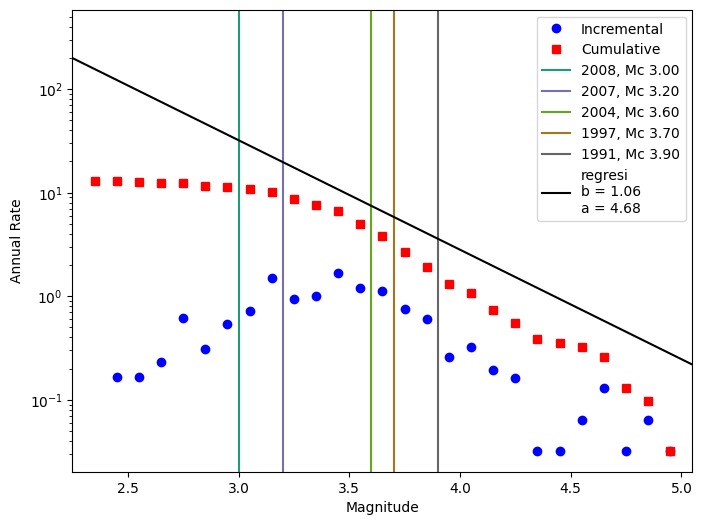

In [6]:
magnitude_bin_width = 0.1
m_range = [2., 5.5]
plot_observed_reccurence_with_Mc(catalogue, completeness_table, completeness_table_old, 
                                 magnitude_bin_width, cmap_Mc='Dark2')
plt.plot(m_range, [10**(a_val-b_val*m_range[0]), 10**(a_val-b_val*m_range[1])], c='black', label=f"regresi\nb = {b_val:.2f}\na = {a_val:.2f}")
plt.legend()
plt.savefig(os.path.join(dir_figs, 'plot_observed_recurrence_Mc-catalogue_1.png'), dpi=300)

# \#\#\# Extra \#\#\#

-+- ctime 2008.0  m_c 3.000000000000001
bval:  0.8129650400159377 sigma_b:  0.04760559104515381 neqi:  171 aval:  3.52576319476173 sigma_a:  0.14281677313546126

== a dan b value ==
b value =  0.8129650400159377 
sigma_b =  0.04760559104515381 
a value =  3.52576319476173 
sigma_a =  0.14281677313546126
-+- ctime 2007.0  m_c 3.200000000000001
bval:  1.0057345896706864 sigma_b:  0.07682364997625746 neqi:  143 aval:  4.197595465355578 sigma_a:  0.24583567992402422

== a dan b value ==
b value =  1.0057345896706864 
sigma_b =  0.07682364997625746 
a value =  4.197595465355579 
sigma_a =  0.24583567992402333
-+- ctime 2004.0  m_c 3.6000000000000014
bval:  1.293643137584153 sigma_b:  0.13754421100404884 neqi:  84 aval:  5.3261220762615284 sigma_a:  0.4951591596145759

== a dan b value ==
b value =  1.293643137584153 
sigma_b =  0.13754421100404884 
a value =  5.3261220762615284 
sigma_a =  0.4951591596145759
-+- ctime 1997.0  m_c 3.7000000000000015
bval:  1.339074652535021 sigma_b:  0.14821

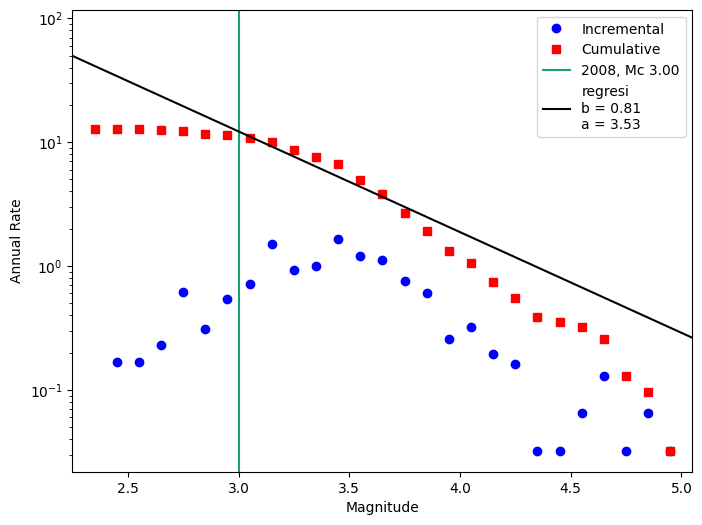

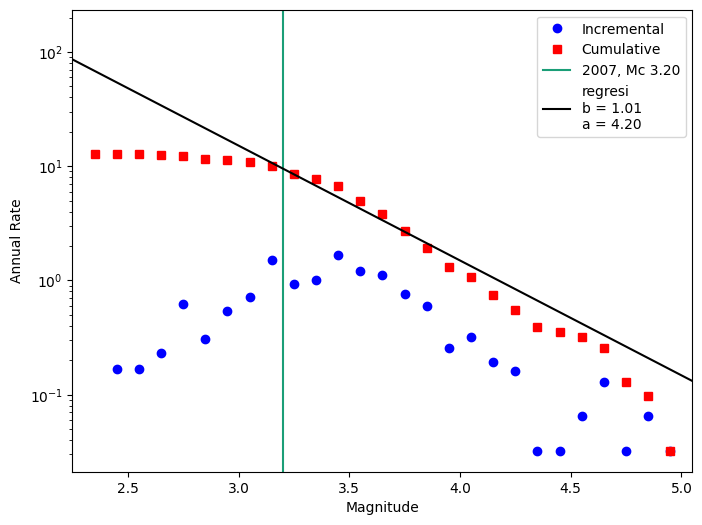

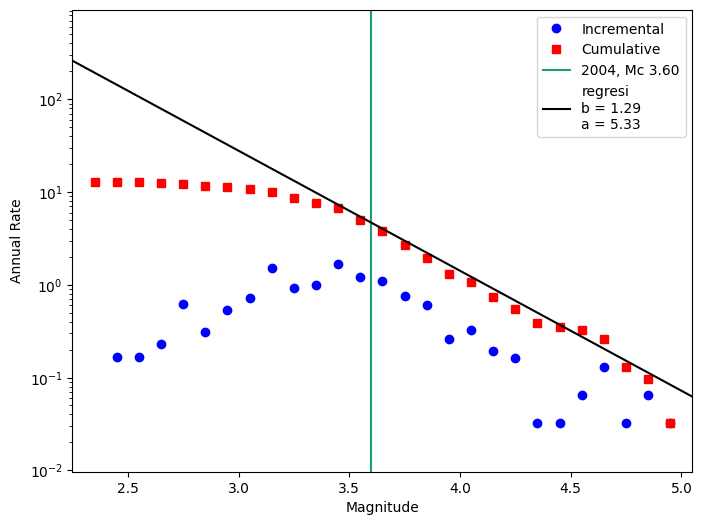

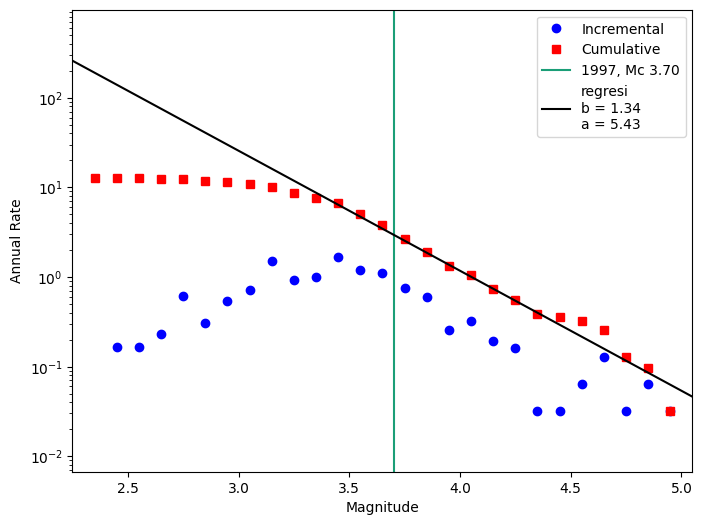

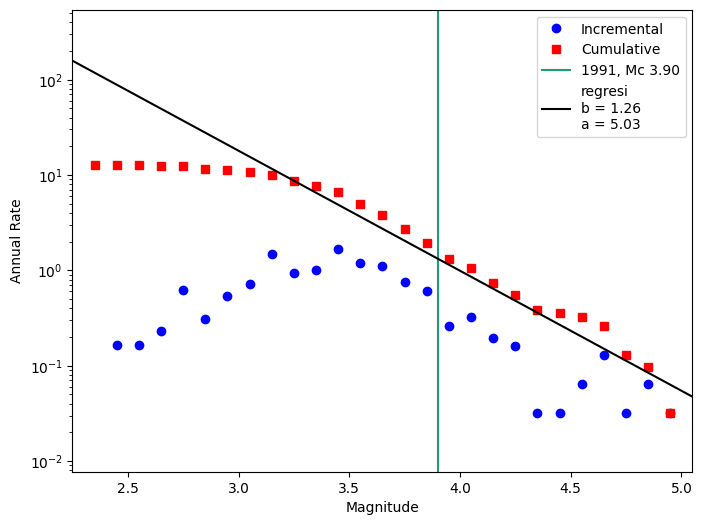

In [7]:
for i, comp in enumerate(completeness_table):
    comp_i = np.array([comp.tolist()])
    mle_config = {'magnitude_interval': 0.1 ,
                  'Average Type': 'Weighted',
                  'reference_magnitude': None }
    b_val, sigma_b, a_val, sigma_a = b_a_value(catalogue, mle_config, comp_i)

    print("\n== a dan b value ==")
    print("b value = ", b_val, 
          "\nsigma_b = ", sigma_b, 
          "\na value = ", a_val, 
          "\nsigma_a = ", sigma_a)
    
    magnitude_bin_width = 0.1
    m_range = [2., 5.5]
    plot_observed_reccurence_with_Mc(catalogue, comp_i, completeness_table_old, 
                                     magnitude_bin_width, cmap_Mc='Dark2')
    plt.plot(m_range, [10**(a_val-b_val*m_range[0]), 10**(a_val-b_val*m_range[1])], c='black', label=f"regresi\nb = {b_val:.2f}\na = {a_val:.2f}")
    plt.legend()
    plt.savefig(os.path.join(dir_figs, f'plot_observed_recurrence_Mc-catalogue_1-{i}.png'), dpi=300)